In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data


In [3]:
camera = data.camera()

In [4]:
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [5]:
type(camera)

numpy.ndarray

In [6]:
camera.shape

(512, 512)

In [7]:
camera.size

262144

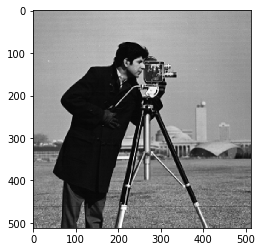

In [11]:
plt.imshow(camera, 'gray')

In [12]:
camera.min()

0

In [13]:
camera.max()

255

In [14]:
camera.mean()

118.31400299072266

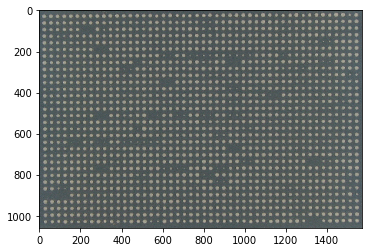

In [16]:
from skimage import io

colon = io.imread('yeast_colony_array.jpg')
plt.imshow(colon)

In [18]:
colon.shape

(1059, 1571, 3)

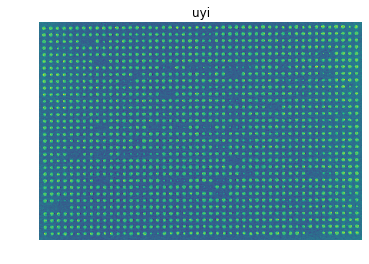

In [24]:
plt.imshow(colon[:,:,2])
plt.title('uyi')
plt.axis('off');

In [27]:
camera = data.camera()
camera[10,20]

153

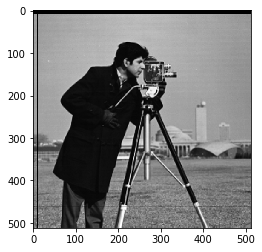

In [30]:
camera[:10] = 0
plt.imshow(camera, 'gray')

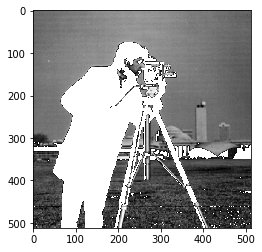

In [33]:
camera = data.camera()
mask = camera < 87
camera[mask] = 255
plt.imshow(camera, 'gray')

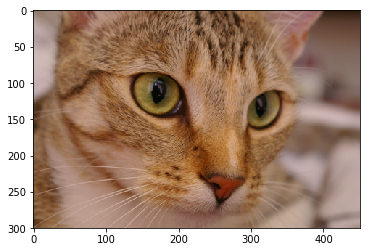

In [35]:
cat = data.chelsea()
plt.imshow(cat)

In [39]:
cat.shape
cat.size

405900

In [40]:
cat.shape


(300, 451, 3)

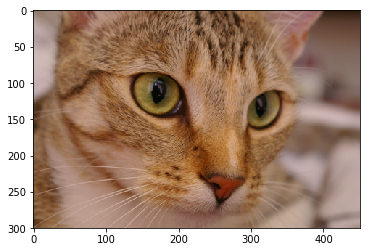

In [41]:
cat[50, 60] = [0, 255, 0]
plt.imshow(cat)

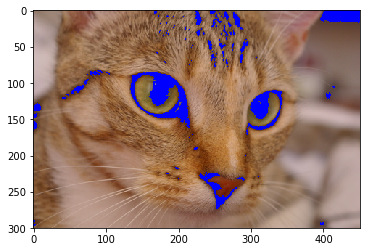

In [51]:
cat = data.chelsea()

red_cat = cat.copy()

mask = cat[:, :, 0] < 87
red_cat[mask] = [0, 0, 255]

plt.imshow(red_cat)


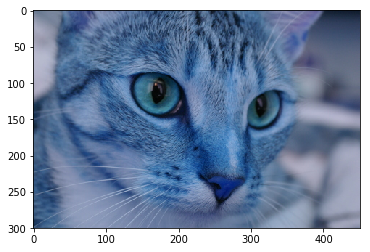

In [52]:
BGR_cat = cat[:,:,::-1]
plt.imshow(BGR_cat)

In [54]:
img = data.camera()
img.shape

(512, 512)

In [55]:
img.ravel()

array([156, 157, 160, ..., 121, 113, 111], dtype=uint8)

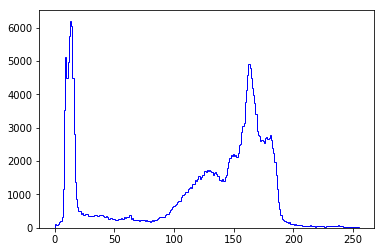

In [56]:
plt.hist(img.ravel(), bins=256, histtype='step', color='blue');

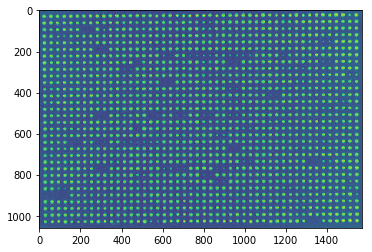

In [58]:
from skimage.color import rgb2gray
img = rgb2gray(colon)
plt.imshow(img)

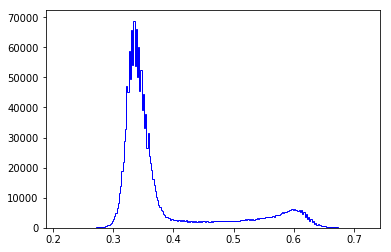

In [59]:
plt.hist(img.ravel(), bins=256, histtype='step', color='blue');

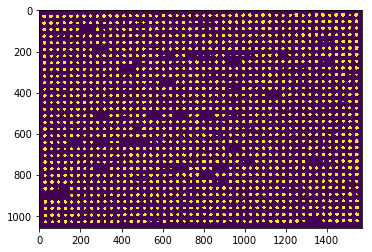

In [61]:
plt.imshow(img > 0.5)

In [62]:
from skimage.filters import sobel
from skimage.morphology import watershed

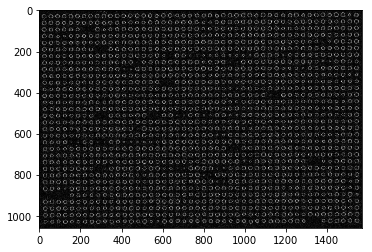

In [63]:
elavation = sobel(img)
plt.imshow(elavation, 'gray')

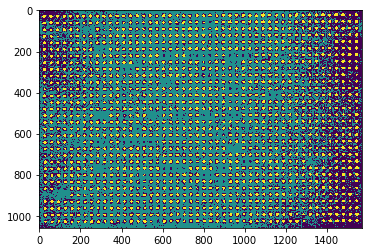

In [65]:
masks = np.zeros_like(img)
masks[img < 0.35] = 1
masks[img > 0.55] = 2
plt.imshow(masks)


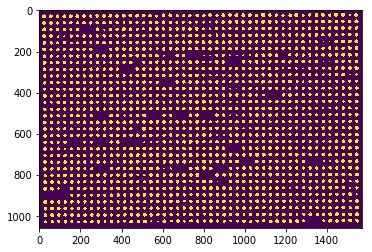

In [72]:
segmentation = watershed(elavation, masks)
segmentation [segmentation == 1] = 0
plt.imshow(segmentation)

In [75]:
from scipy import ndimage as nd
labelled, number = nd.label(segmentation)

In [76]:
number

1481

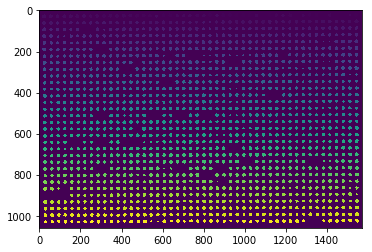

In [77]:
plt.imshow(labelled)